# Simple gradient method

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

In [104]:
def himmelblau_gradient(x):
    x1, x2 = x[0], x[1]
    df_dx = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    df_dy = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([df_dx, df_dy])

def ackley_gradient(x):
    x1, x2 = x[0], x[1]
    common_part_1 = 2 * 2**(0.5) *np.sqrt(x1**2 + x2**2)**(-0.5) * np.exp(-np.sqrt(2 * (x1**2 + x2**2)) / 10)
    common_part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    df_dx = common_part_1 * x1 + np.pi * np.sin(2 * np.pi * x1) * common_part_2
    df_dy = common_part_1 * x2 + np.pi * np.sin(2 * np.pi * x2) * common_part_2
    return np.array([df_dx, df_dy])

## Algorithm

In [105]:
def simple_gradient(function, gradient, x, learning_rate, err=0.0001, max_iter=10000, decay=0.9):
    algorithm_path = [x]
    iterations = 0

    for i in range(max_iter):
        xnew = x - learning_rate * gradient(x)

        if np.linalg.norm(xnew - x) < err:
            break

        if function(xnew) > function(x):
            learning_rate *= decay
        
        algorithm_path.append(xnew)
        x = xnew
        iterations = i
    
    return np.array(algorithm_path), iterations

#### Checking whether the algorithm works near known minimums

In [106]:
# Himmelblau function
simple_gradient(himmelblau, himmelblau_gradient, np.array([3.1, 2.1]), 0.01)

(array([[3.1       , 2.1       ],
        [3.00176   , 2.04296   ],
        [2.99182455, 2.02755241],
        [2.99233369, 2.01964432],
        [2.99405506, 2.01441045],
        [2.99555879, 2.01065264],
        [2.99670728, 2.0078932 ],
        [2.99756114, 2.00585391],
        [2.99819286, 2.00434357],
        [2.99866019, 2.0032239 ],
        [2.99900619, 2.00239338],
        [2.99926256, 2.00177709],
        [2.99945264, 2.00131965],
        [2.99959364, 2.00098005],
        [2.99969827, 2.00072788],
        [2.99977594, 2.00054063],
        [2.9998336 , 2.00040156],
        [2.99987641, 2.00029827]]),
 16)

In [107]:
# Ackley function
simple_gradient(ackley, ackley_gradient, np.array([0.1, 0.1]), 0.0001)

(array([[0.1       , 0.1       ],
        [0.09951159, 0.09951159],
        [0.09902436, 0.09902436],
        [0.09853833, 0.09853833],
        [0.0980535 , 0.0980535 ],
        [0.09756987, 0.09756987],
        [0.09708747, 0.09708747],
        [0.0966063 , 0.0966063 ],
        [0.09612637, 0.09612637],
        [0.09564768, 0.09564768],
        [0.09517025, 0.09517025],
        [0.09469409, 0.09469409],
        [0.0942192 , 0.0942192 ],
        [0.09374559, 0.09374559],
        [0.09327327, 0.09327327],
        [0.09280225, 0.09280225],
        [0.09233254, 0.09233254],
        [0.09186414, 0.09186414],
        [0.09139707, 0.09139707],
        [0.09093132, 0.09093132],
        [0.09046692, 0.09046692],
        [0.09000386, 0.09000386],
        [0.08954215, 0.08954215],
        [0.0890818 , 0.0890818 ],
        [0.08862282, 0.08862282],
        [0.08816522, 0.08816522],
        [0.08770899, 0.08770899],
        [0.08725416, 0.08725416],
        [0.08680071, 0.08680071],
        [0.086

## Creating functions for data visualisation

#### Function for displaying 3d plots

In [108]:
def plot3d_function(function, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=color)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

#### Function for displaying contour plots with colorbar

In [109]:
import pandas as pd

In [110]:
def plot_contour(function, gradient, starting_points, learning_rate=0.01, depth=50, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, depth, cmap=color)
    plt.colorbar(contour)
    plt.xlabel('x')
    plt.ylabel('y')

    for starting_point in starting_points:
        plt.plot(starting_point[0], starting_point[1], 'ko', zorder=5)
        path = simple_gradient(function, gradient, starting_point, learning_rate)[0]
        plt.plot(path[:, 0], path[:, 1], color='black', zorder=5)
        plt.plot(path[-1, 0], path[-1, 1], 'r.', zorder=5)
    plt.show()

#### Function for displaying algorithm parameters in table

In [111]:
def display_parameters(function, gradient, starting_points, learning_rate=0.01):
    table = pd.DataFrame(starting_points, columns=['x', 'y'])

    iterations_table = []
    ending_x = []
    ending_y = []

    for starting_point in starting_points:
        path, iterations = simple_gradient(function, gradient, starting_point, learning_rate)
        iterations_table.append(iterations)
        ending_x.append(path[-1][0])
        ending_y.append(path[-1][1])

    table['iterations'] = np.array(iterations_table)
    table['ending x'] = np.array(ending_x)
    table['ending y'] = np.array(ending_y)
    
    return table

## Testing the algorithm for multiple points with different `learning_rate` values

### 1. Himmelblau's function

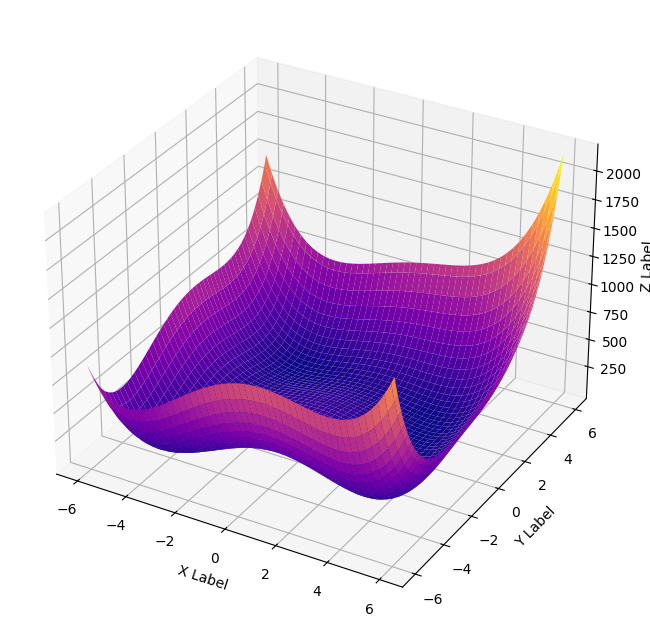

In [112]:
plot3d_function(himmelblau)

#### Creating starting points

In [113]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (30, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

#### `learning_rate=0.01`

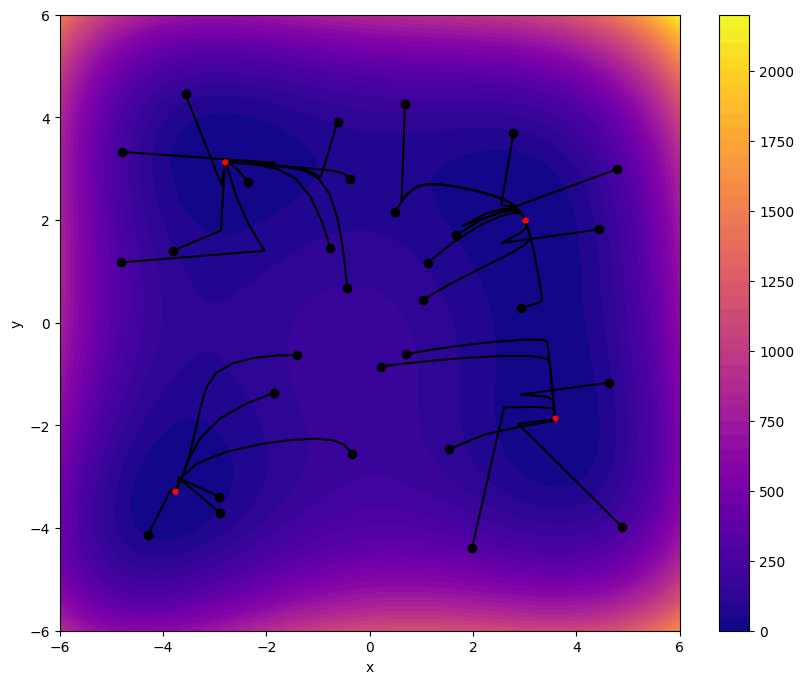

In [114]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.01, depth=50)

In [115]:
display_parameters(himmelblau, himmelblau_gradient, starting_points, 0.01)

,x,y,iterations,ending x,ending y
0,0.488135,2.151894,31,2.999889,2.000267
1,1.027634,0.448832,29,3.000128,1.999690
2,-0.763452,1.458941,14,-2.805062,3.131308
3,-0.624128,3.917730,13,-2.805012,3.131304
4,4.636628,-1.165585,24,3.584401,-1.847830
5,2.917250,0.288949,40,3.000146,1.999648
6,0.680446,4.255966,31,2.999877,2.000298
7,-4.289639,-4.128707,7,-3.779276,-3.283205
8,-4.797816,3.326198,10,-2.804988,3.131302
9,2.781568,3.700121,24,2.999886,2.000274


#### `learning_rate=0.001`

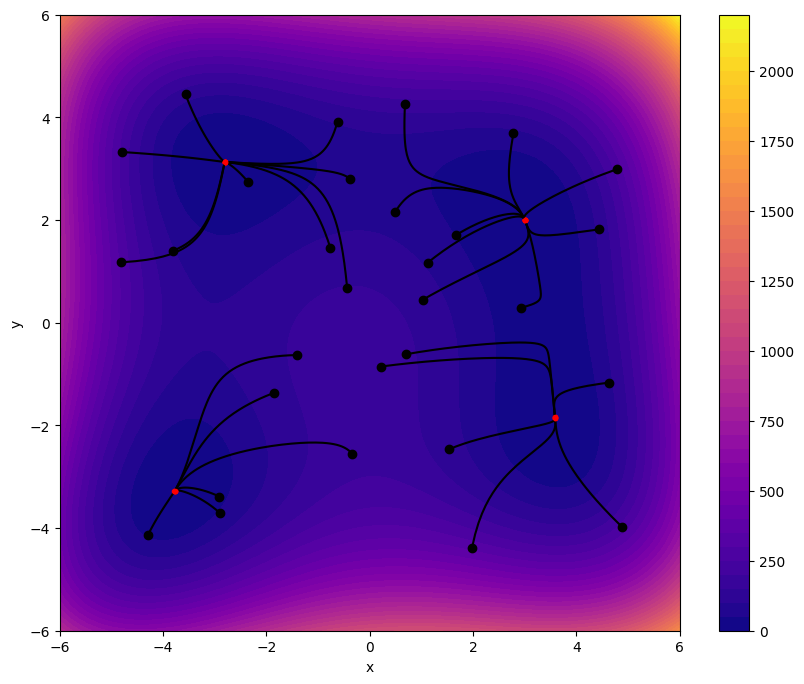

In [116]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.001, depth=50)

#### `learning_rate=0.0001`

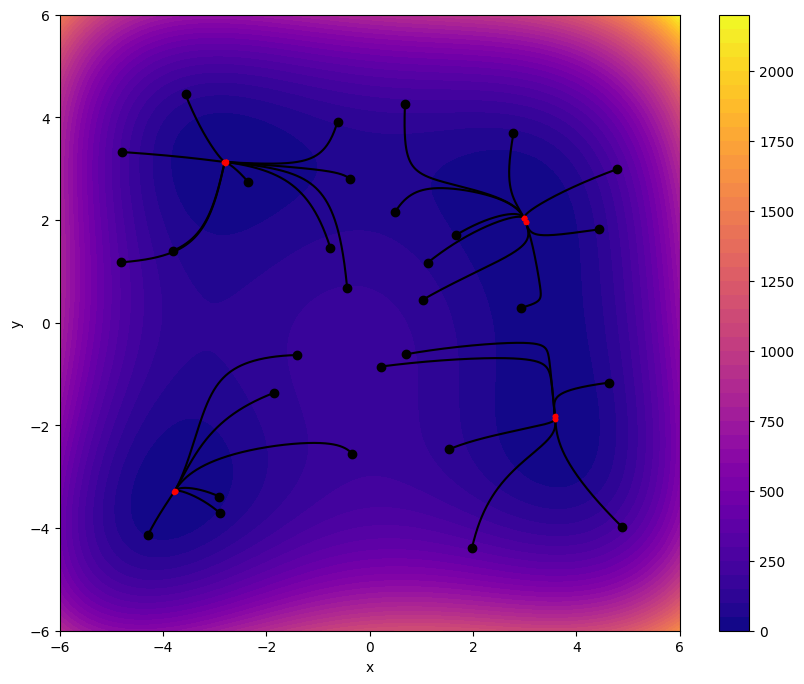

In [117]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.0001, depth=50)

#### `learning_rate=0.00001`

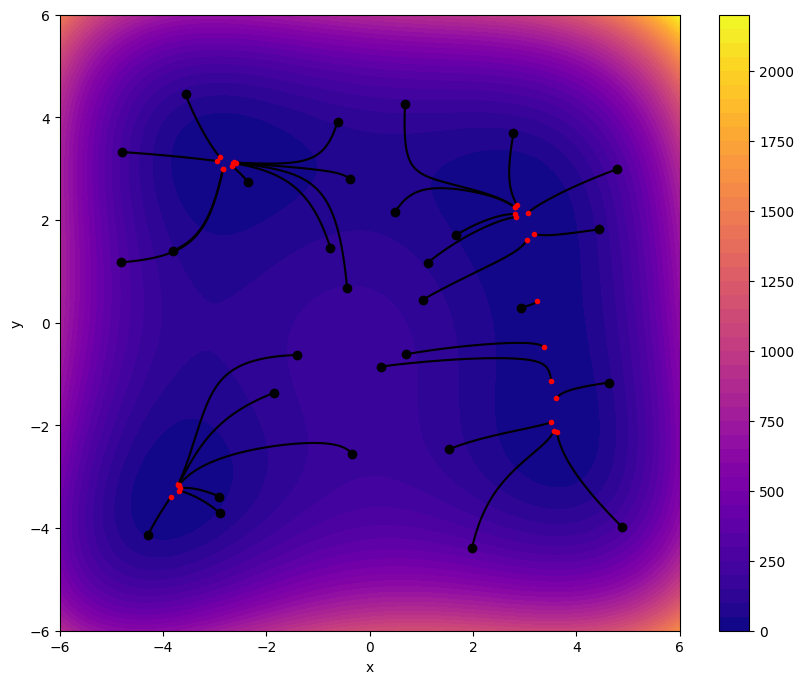

In [118]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.00001, depth=50)

### 2. Ackley's function

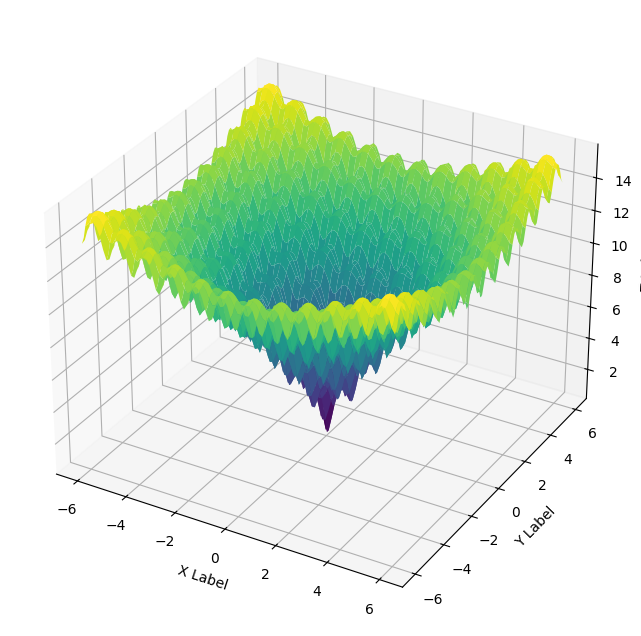

In [119]:
plot3d_function(ackley, color='viridis')

#### Creating starting points

In [120]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (100, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

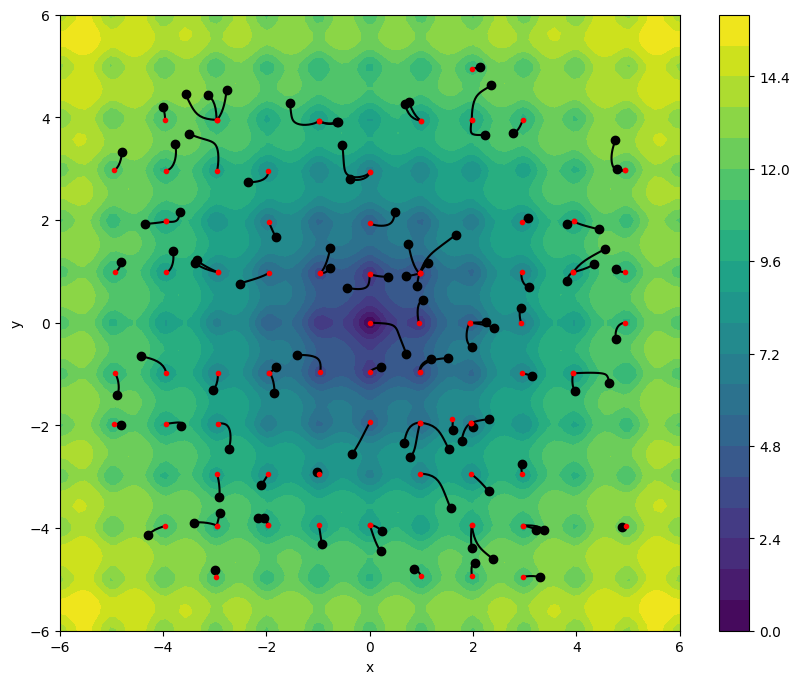

In [121]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.01, depth=20, color='viridis')

#### `learning_rate=0.01`

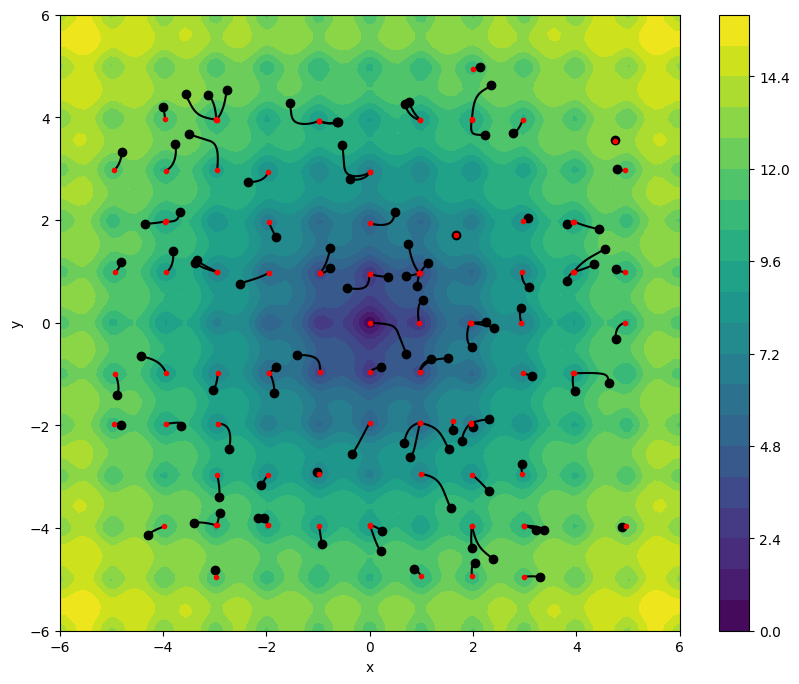

In [122]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.001, depth=20, color='viridis')

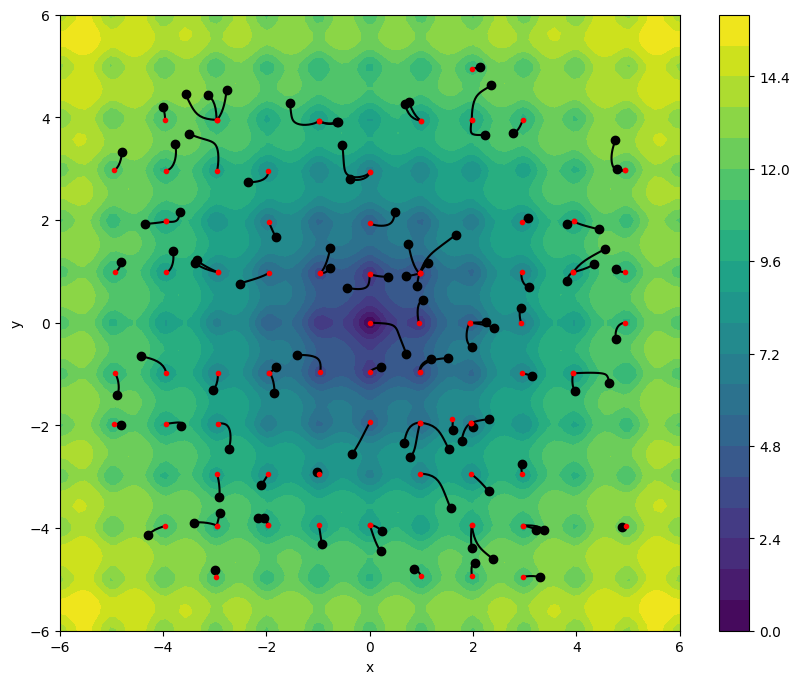

In [123]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.01, depth=20, color='viridis')

#### `learning_rate=0.001`

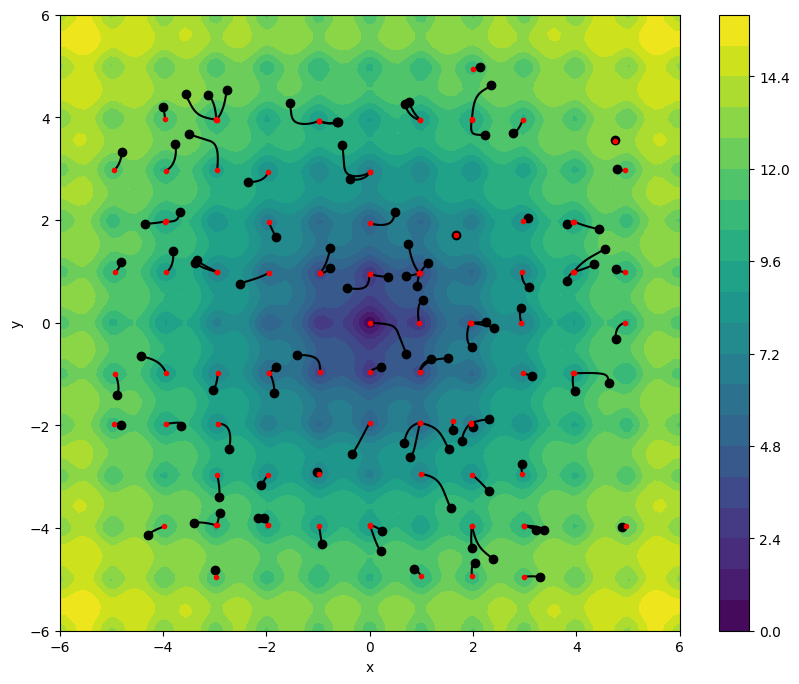

In [124]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.001, depth=20, color='viridis')

#### `learning_rate=0.0001`

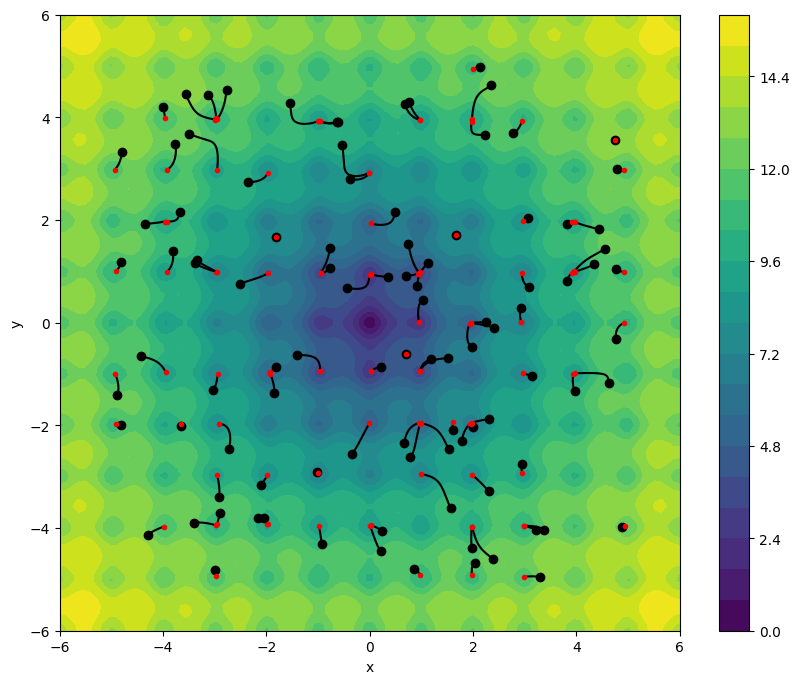

In [125]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.0001, depth=20, color='viridis')